In [19]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

## Define growing season length


In [ ]:
def growing_season_length(ds):

    n_lats = len(ds.lat)
    n_lons = len(ds.lon)
    n_years = int(len(ds.time)/365)

    growing_season_length = np.zeros((n_lats, n_lons, n_years))
    temp_threshold = 273.15 + 5 # Temperature threshold for growing
    time_threshold_start = 7 # Time threshold with growing conditions for growing season to start
    time_threshold_end = 7 # Time threshold with non-growing conditions for growing season to end

    for lat in range(n_lats):
        for lon in range(n_lons):
            for year in range(n_years):
                ds1 = ds.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365)) # Choose grid box and year
                grow = ds1.values >= temp_threshold # Growing conditions
                non_grow = ds1.values < temp_threshold # Non-growing conditions

                grow_idx = list(np.where(grow)[0]) # Find indexes of different growing conditions
                non_grow_idx = list(np.where(non_grow)[0]) # Find indexes of non-growing conditions

                if not grow_idx:
                    # No growing season
                    length = 0
                elif not non_grow_idx:
                    # Only growing season
                    length = 365
                else:
                    non_grow_idx = np.array(non_grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    grow_idx = np.array(grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    # Find the first day when the differences in days between non-growing conditions is more than time threshold
                    # The start of the growing season is one week after this
                    start_of_GSL = non_grow_idx[np.where(np.diff(non_grow_idx) >= time_threshold_start)]
                    # NB!! Problems with finding start of GSL for some areas
                    start_of_GSL = start_of_GSL[0] + 7
                    print("Start: ", start_of_GSL)
                
                    # Find when the differences between growing conditions indexes is larger than time threshold
                    # Choose the first sufficiently long non-growing period after the growing season start
                    
                    end_of_GSL = grow_idx[np.where(np.diff(grow_idx) >= time_threshold_end)]
                    if np.any(end_of_GSL > start_of_GSL):
                        end_of_GSL = end_of_GSL[np.where(end_of_GSL > start_of_GSL)][0]
                    else:
                        end_of_GSL = 364
                    print("End: ", end_of_GSL)
                    length = end_of_GSL-start_of_GSL + 1 # Add 1 to include the whole growing season period
                
                print("Length: ", length)
                growing_season_length[lat, lon, year] = length
        
    return growing_season_length

In [ ]:
def growing_season_length_v2(ds):

    n_lats = len(ds.lat)
    n_lons = len(ds.lon)
    n_years = int(len(ds.time)/365)

    growing_season_length = np.zeros((n_lats, n_lons, n_years))
    temp_threshold = 273.15 + 5 # Temperature threshold for growing
    time_threshold_start = 7 # Time threshold with growing conditions for growing season to start
    time_threshold_end = 7 # Time threshold with non-growing conditions for growing season to end

    for lat in range(n_lats):
        for lon in range(n_lons):
            for year in range(n_years):
                ds1 = ds.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365)) # Choose grid box and year
                grow = ds1.values >= temp_threshold # Growing conditions
                non_grow = ds1.values < temp_threshold # Non-growing conditions

                grow_idx = list(np.where(grow)[0]) # Find indexes of different growing conditions
                non_grow_idx = list(np.where(non_grow)[0]) # Find indexes of non-growing conditions

                if not grow_idx:
                    # No growing season
                    length = 0
                elif not non_grow_idx:
                    # Only growing season
                    length = 365
                else:
                    non_grow_idx = np.array(non_grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    grow_idx = np.array(grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    # Find the days when the differences in days between non-growing conditions is more than time threshold
                    # Choose the day with the maximum difference
                    # The start of the growing season is one week after this
                    start_of_GSL = non_grow_idx[np.where(np.diff(non_grow_idx) >= time_threshold_start)]
                    print(start_of_GSL)
                    if not list(start_of_GSL):
                        length = 0
                    elif len(start_of_GSL) == 1:
                        start_of_GSL = start_of_GSL[0]
                    else:
                        start_of_GSL = start_of_GSL[np.where(np.diff(start_of_GSL) == np.max(np.diff(start_of_GSL)))][0] + 7
                    print("Start: ", start_of_GSL)
                
                    # Find when the differences between growing conditions indexes is larger than time threshold
                    # Choose the first sufficiently long non-growing period after the growing season start
                    
                    end_of_GSL = grow_idx[np.where(np.diff(grow_idx) >= time_threshold_end)]
                    if np.any(end_of_GSL > start_of_GSL):
                        end_of_GSL = end_of_GSL[np.where(end_of_GSL > start_of_GSL)][0]
                    else:
                        end_of_GSL = 364
                    print("End: ", end_of_GSL)
                    length = end_of_GSL-start_of_GSL + 1 # Add 1 to include the whole growing season period
                
                print("Length: ", length)
                growing_season_length[lat, lon, year] = length
        
    return growing_season_length

In [49]:
def growing_season_length_v3(ds):

    n_lats = len(ds.lat)
    n_lons = len(ds.lon)
    n_years = int(len(ds.time)/365)

    growing_season_length = np.zeros((n_lats, n_lons, n_years))
    temp_threshold = 273.15 + 5 # Temperature threshold for growing
    time_threshold_start = 7 # Time threshold with growing conditions for growing season to start
    time_threshold_end = 7 # Time threshold with non-growing conditions for growing season to end

    for lat in range(n_lats):
        for lon in range(n_lons):
            for year in range(n_years):
                ds1 = ds.isel(lat=lat, lon=lon, time=slice(year*365,(year+1)*365)) # Choose grid box and year
                grow = ds1.values >= temp_threshold # Growing conditions
                non_grow = ds1.values < temp_threshold # Non-growing conditions

                grow_idx = list(np.where(grow)[0]) # Find indexes of different growing conditions
                non_grow_idx = list(np.where(non_grow)[0]) # Find indexes of non-growing conditions

                if not grow_idx:
                    # No growing season
                    length = 0
                elif not non_grow_idx:
                    # Only growing season
                    length = 365
                else:
                    non_grow_idx = np.array(non_grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    grow_idx = np.array(grow_idx+[364]) # Add end point of the year to make sure to catch grouped indexes
                    # Find the days when the differences in days between non-growing conditions is more than time threshold
                    # Choose the day with the maximum difference
                    # The start of the growing season is one week after this
                    start_of_GSL = non_grow_idx[np.where(np.diff(non_grow_idx) >= time_threshold_start)]
                    print("Start_day: ", start_of_GSL)
                    if not list(start_of_GSL):
                        length = 0
                    else:
                        start_of_GSL = start_of_GSL + 7
                        end_of_GSL = grow_idx[np.where(np.diff(grow_idx) >= time_threshold_end)]
                        print("End days: ",end_of_GSL)
                        if not list(end_of_GSL):
                            length = 365
                        else:
                            growing_periods = []
                            for start_day in start_of_GSL:
                                if np.any(end_of_GSL > start_day):
                                    end_day = end_of_GSL[np.where(end_of_GSL > start_day)][0]
                                else:
                                    end_day = 364
                                growing_periods.append(end_day-start_day+1)

                            length = np.max(growing_periods)
                
                print("Length: ", length)
                growing_season_length[lat, lon, year] = length
        
    return growing_season_length

## Load relevant climate variables from CMIP6 data

In [52]:
# Define dataset specifics

model_scenario_name = 'NorESM2-LM_ssp126' # Choose a model and SSP scenario
area_name = 'germany' # Choose an area

# Defines start and end of time slice by picking 20 years before and 20 years after abrupt SPG cooling
if model_scenario_name == 'NorESM2-LM_ssp126':
    start_time = '2015-01-01'; end_time = '2055-01-01'
    time_array = np.arange(2015, 2055, 1)
elif model_scenario_name == 'CESM2-WACCM_ssp126':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    time_array = np.arange(2020, 2060, 1)
elif model_scenario_name == 'MRI-ESM2_ssp245':
    start_time = '2020-01-01'; end_time = '2060-01-01'
    time_array = np.arange(2020, 2060, 1)
else:
    print("This dataset is not considered in the current study, but can be added to the analysis")

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360
else:
    print("This area is not predefined in the current study, but can be added to the analysis")

data_folder = '../CMIP6_data/' # Folder where downloaded CMIP6 data is stored
save_folder = '../climatic_indices/' # Folder where climate indices should be saved
os.makedirs(save_folder, exist_ok=True) 


# Load mean daily temperature data

files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
tas = xr.open_mfdataset(files)

temp = tas.tas.sel(lat=slice(southern_lat, northern_lat), 
                        lon=slice(western_lon, eastern_lon), 
                        time=slice(start_time, end_time))

temp.load()

<xarray.DataArray 'tas' (time: 14601, lat: 4, lon: 5)> Size: 1MB
array([[[279.39438, 276.9695 , 274.30945, 274.06384, 274.2197 ],
        [278.9008 , 276.45325, 273.21292, 271.73822, 270.47147],
        [272.95776, 269.71802, 268.5377 , 267.652  , 267.29874],
        [273.19327, 270.7024 , 268.00412, 268.7688 , 269.5234 ]],

       [[284.97485, 281.65546, 275.9246 , 274.38455, 273.9525 ],
        [283.08002, 280.09518, 275.30453, 273.04587, 269.73923],
        [275.64426, 272.19238, 269.88846, 268.08026, 266.61282],
        [274.21844, 271.5365 , 268.86493, 269.62927, 270.05988]],

       [[284.75595, 282.871  , 278.56387, 276.38815, 275.4695 ],
        [282.79163, 281.51956, 279.31274, 275.90976, 274.44067],
        [280.19904, 275.4467 , 274.34827, 272.49423, 270.18747],
        [278.79526, 275.58444, 272.19437, 271.60983, 270.52307]],

       ...,

       [[275.22116, 273.79102, 272.50085, 272.06754, 272.61356],
        [276.04184, 274.59558, 273.90356, 273.69028, 273.51175],
        [279.88898, 275.9337 , 274.66312, 274.53812, 274.10638],
        [280.48398, 279.63742, 277.06647, 275.7069 , 275.19843]],

       [[277.10947, 275.17242, 273.66275, 273.0183 , 273.2199 ],
        [277.1679 , 276.01947, 275.0977 , 274.58005, 274.32477],
        [279.10303, 277.22076, 275.73224, 275.4012 , 275.10638],
        [279.98578, 279.3301 , 277.57764, 277.0816 , 277.18185]],

       [[275.26273, 273.6575 , 273.24014, 273.4091 , 273.44434],
        [275.13892, 273.84305, 273.6216 , 273.53946, 273.66788],
        [277.95407, 276.13483, 274.6531 , 274.3603 , 274.31567],
        [278.9684 , 278.4722 , 276.26898, 276.26852, 276.611  ]]],
      dtype=float32)
Coordinates:
  * time     (time) object 117kB 2015-01-01 12:00:00 ... 2055-01-01 12:00:00
  * lat      (lat) float64 32B 48.32 50.21 52.11 54.0
  * lon      (lon) float64 40B 5.0 7.5 10.0 12.5 15.0
    height   float64 8B 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-12-06T14:54:06Z altered by CMOR: Treated scalar dime...

In [53]:
# Choose which variable to calculate

variable_name = 'GSL_v3'
unit = 'days'
description = 'Growing season length'
input_values = temp
values = growing_season_length_v3(temp)

# Save data as netcdf file

ds = xr.Dataset(
    data_vars=dict(
        variable=(["lat", "lon", "time"], values)
    ),
    coords=dict(
        lat=input_values[0].lat.values,
        lon=input_values[0].lon.values,
        time=time_array,
    ),
)

ds.time.attrs['units'] = 'year'
ds.lat.attrs['description'] = 'latitude'
ds.lon.attrs['description'] = 'longitude'
ds = ds.rename_vars(dict(variable=variable_name))
ds[variable_name].attrs['units'] = unit
ds[variable_name].attrs['description'] = description

ds.to_netcdf(save_folder+variable_name+'_'+area_name+'_'+model_scenario_name+'.nc')
ds

Start_day:  [ 28  59  68  84 308 334 349]
End days:  []
Length:  365
Start_day:  [ 24  44  52  61 318 345]
End days:  [17]
Length:  334
Start_day:  [  3  18  35  63  85 320]
End days:  [46]
Length:  295
Start_day:  [  8  38  58  68 319]
End days:  [  2  19  45 343]
Length:  299
Start_day:  [ 16  59  68  95 306 332]
End days:  [ 47 348]
Length:  283
Start_day:  [ 21  42  49  56  85 304 316 330 337]
End days:  [ 33  69 355]
Length:  264
Start_day:  [  4  19  26  50  80 288 335 345]
End days:  [33]
Length:  332
Start_day:  [  9  28  41  65 292 308 318 331 339]
End days:  [17]
Length:  330
Start_day:  [  7  20  36  67 323]
End days:  [335 346]
Length:  322
Start_day:  [ 12  32  41  59  68 287 319 349]
End days:  [  5  25 308 334]
Length:  270
Start_day:  [ 61  70  94 342]
End days:  [18]
Length:  297
Start_day:  [ 27  79  91 113 330 338 357]
End days:  [  5  40  52  62 345]
Length:  260
Start_day:  [  5  43  54 322 350]
End days:  [17]
Length:  315
Start_day:  [  0  35  59  83  95 109]
End

<xarray.Dataset> Size: 7kB
Dimensions:  (lat: 4, lon: 5, time: 40)
Coordinates:
  * lat      (lat) float64 32B 48.32 50.21 52.11 54.0
  * lon      (lon) float64 40B 5.0 7.5 10.0 12.5 15.0
  * time     (time) int64 320B 2015 2016 2017 2018 2019 ... 2051 2052 2053 2054
Data variables:
    GSL_v3   (lat, lon, time) float64 6kB 365.0 334.0 295.0 ... 223.0 265.0

Text(0.5, 1.0, 'Change in growing season length')

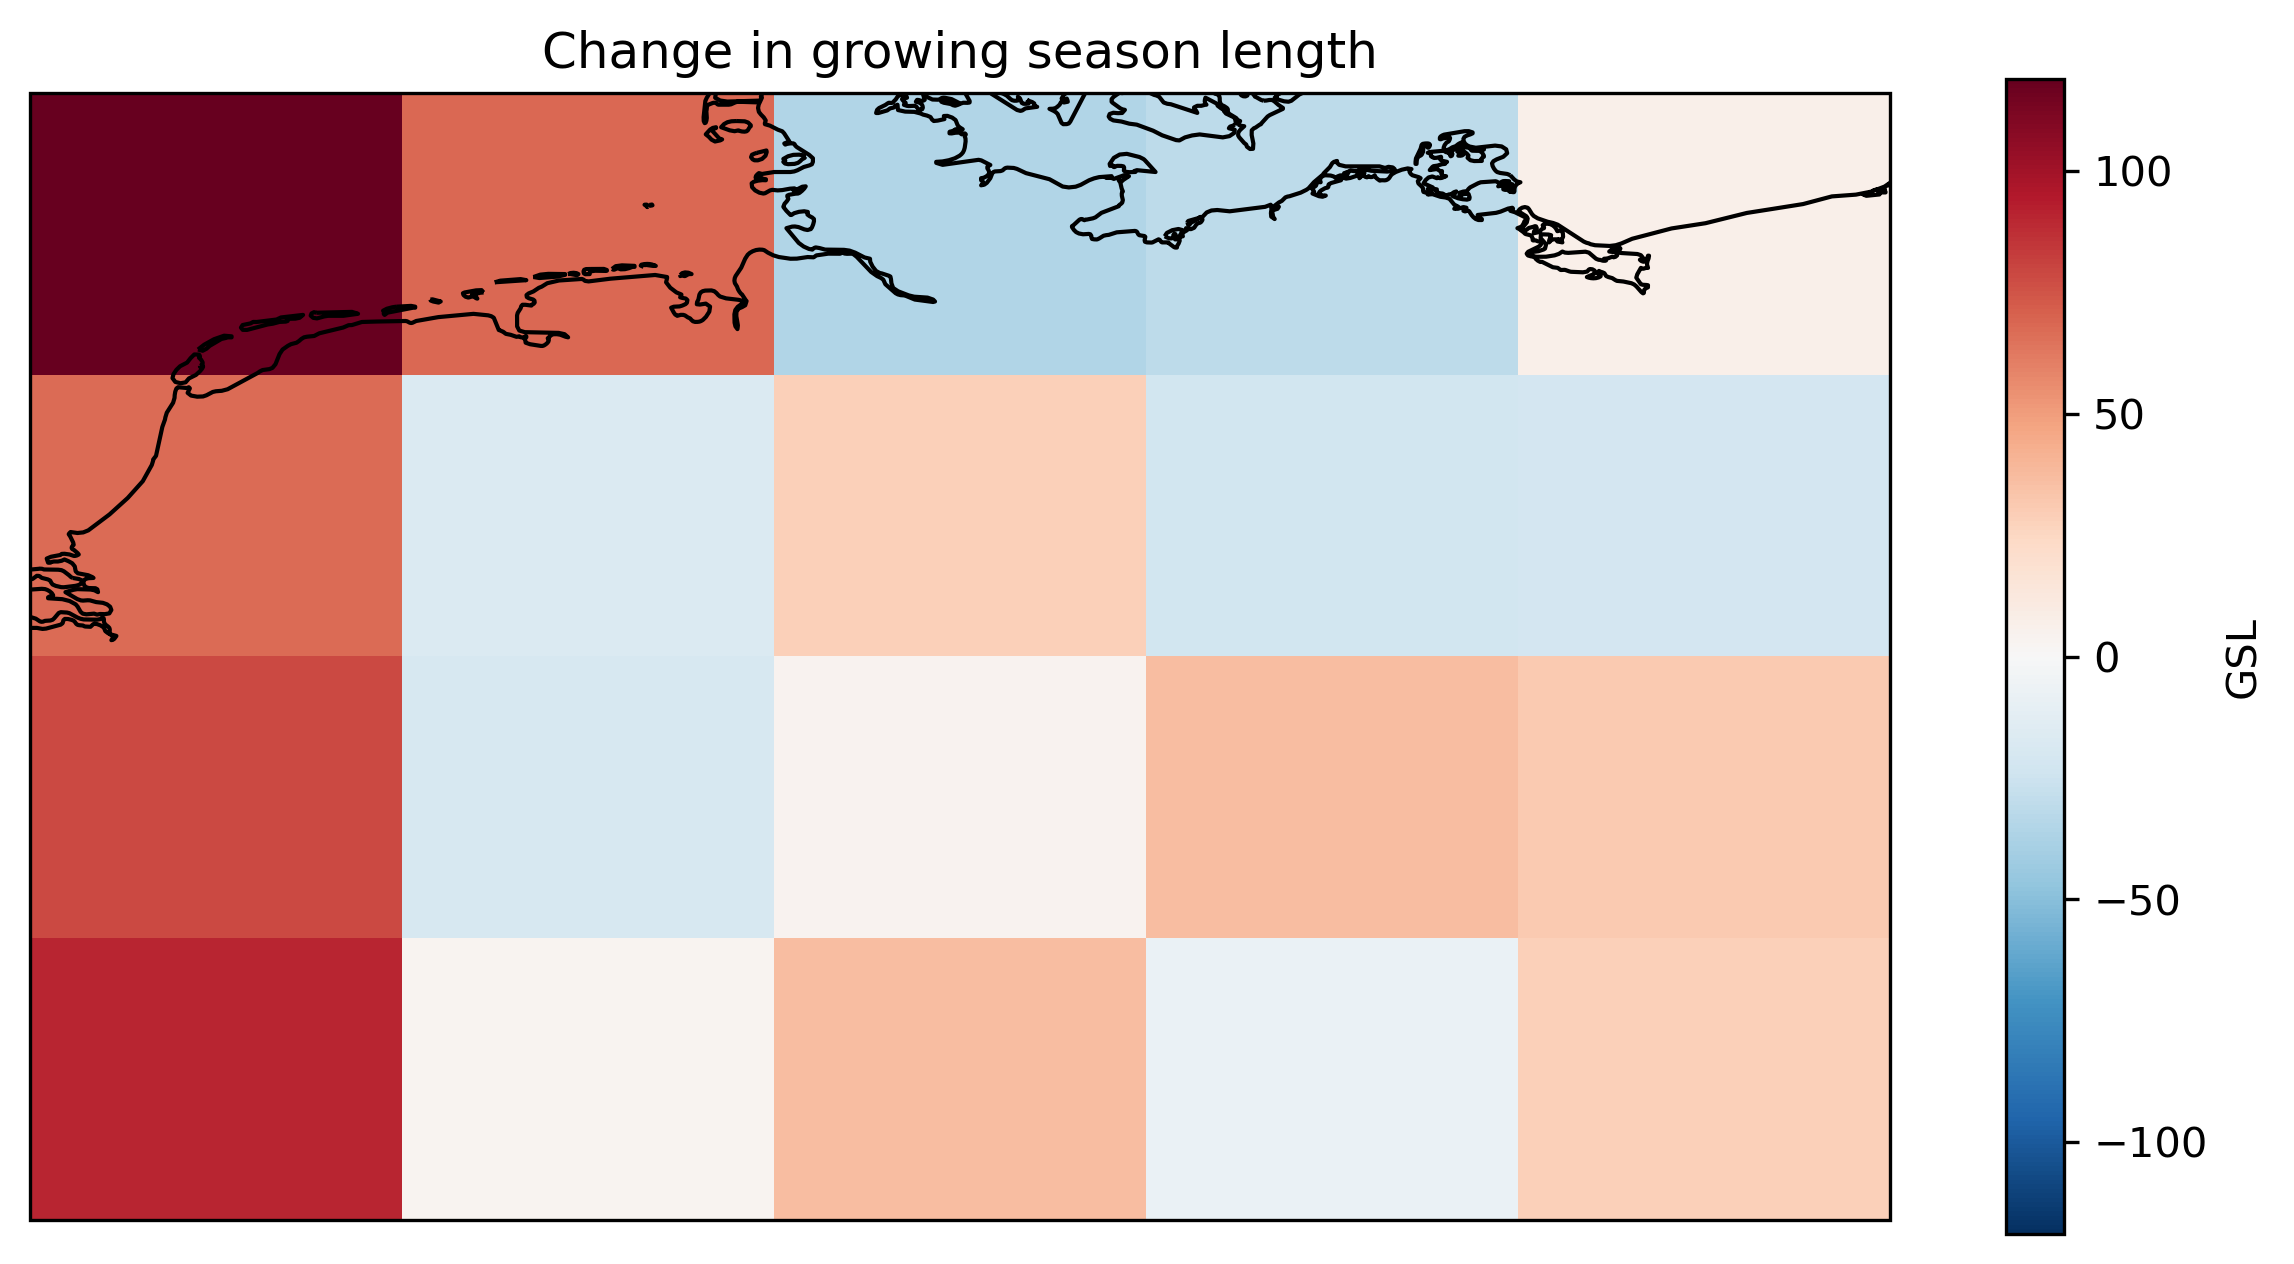

In [ ]:
da = xr.open_dataset(save_folder+variable_name+'_'+area_name+'_'+model_scenario_name+'.nc', decode_timedelta={variable_name : False})
fig = plt.figure(1, figsize=(10,5),dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
diff = da[variable_name].isel(time=slice(20,40)).mean("time") - da[variable_name].isel(time=slice(0,20)).mean("time")
map = diff.plot(ax=ax, 
                transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title("Change in growing season length")

In [ ]:
ds = tas_NorESM.tas.sel(lat=slice(57.6, 72.8), 
                                    lon=slice(1.4, 34.7), 
                                    time=slice('2015-01-01', '2055-01-01'))

growing_season_length = np.zeros((len(ds.lat), len(ds.lon), 40))
print(len(ds.lat))
print(len(ds.lon))
quit()

for lat in range(len(ds.lat)):
    for lon in range(len(ds.lon)):
        for year in range(40):
            count = 0
            length = 0
            print("Year: ",year)
            for day in range(365):
                print("Day: ",day)
                print(ds.isel(lat=lat, lon=lon, time=year+day).values)
                if ds.isel(lat=lat, lon=lon, time=year+day) >= 273.15 + 5:
                    count += 1
                elif count < 7 and ds.isel(lat=lat, lon=lon, time=year+day) < 273.15 + 5 :
                    count = 0
                elif count >= 7 and ds.isel(lat=lat, lon=lon, time=year+day) < 273.15 + 5:
                    length = np.max([count, length])
                    count = 0
                print(count)
            print(length)
            growing_season_length[lat, lon, year] = length

print(growing_season_length)
np.save("norway_growing_season_length.npy", growing_season_length)



NameError: name 'tas_NorESM' is not defined

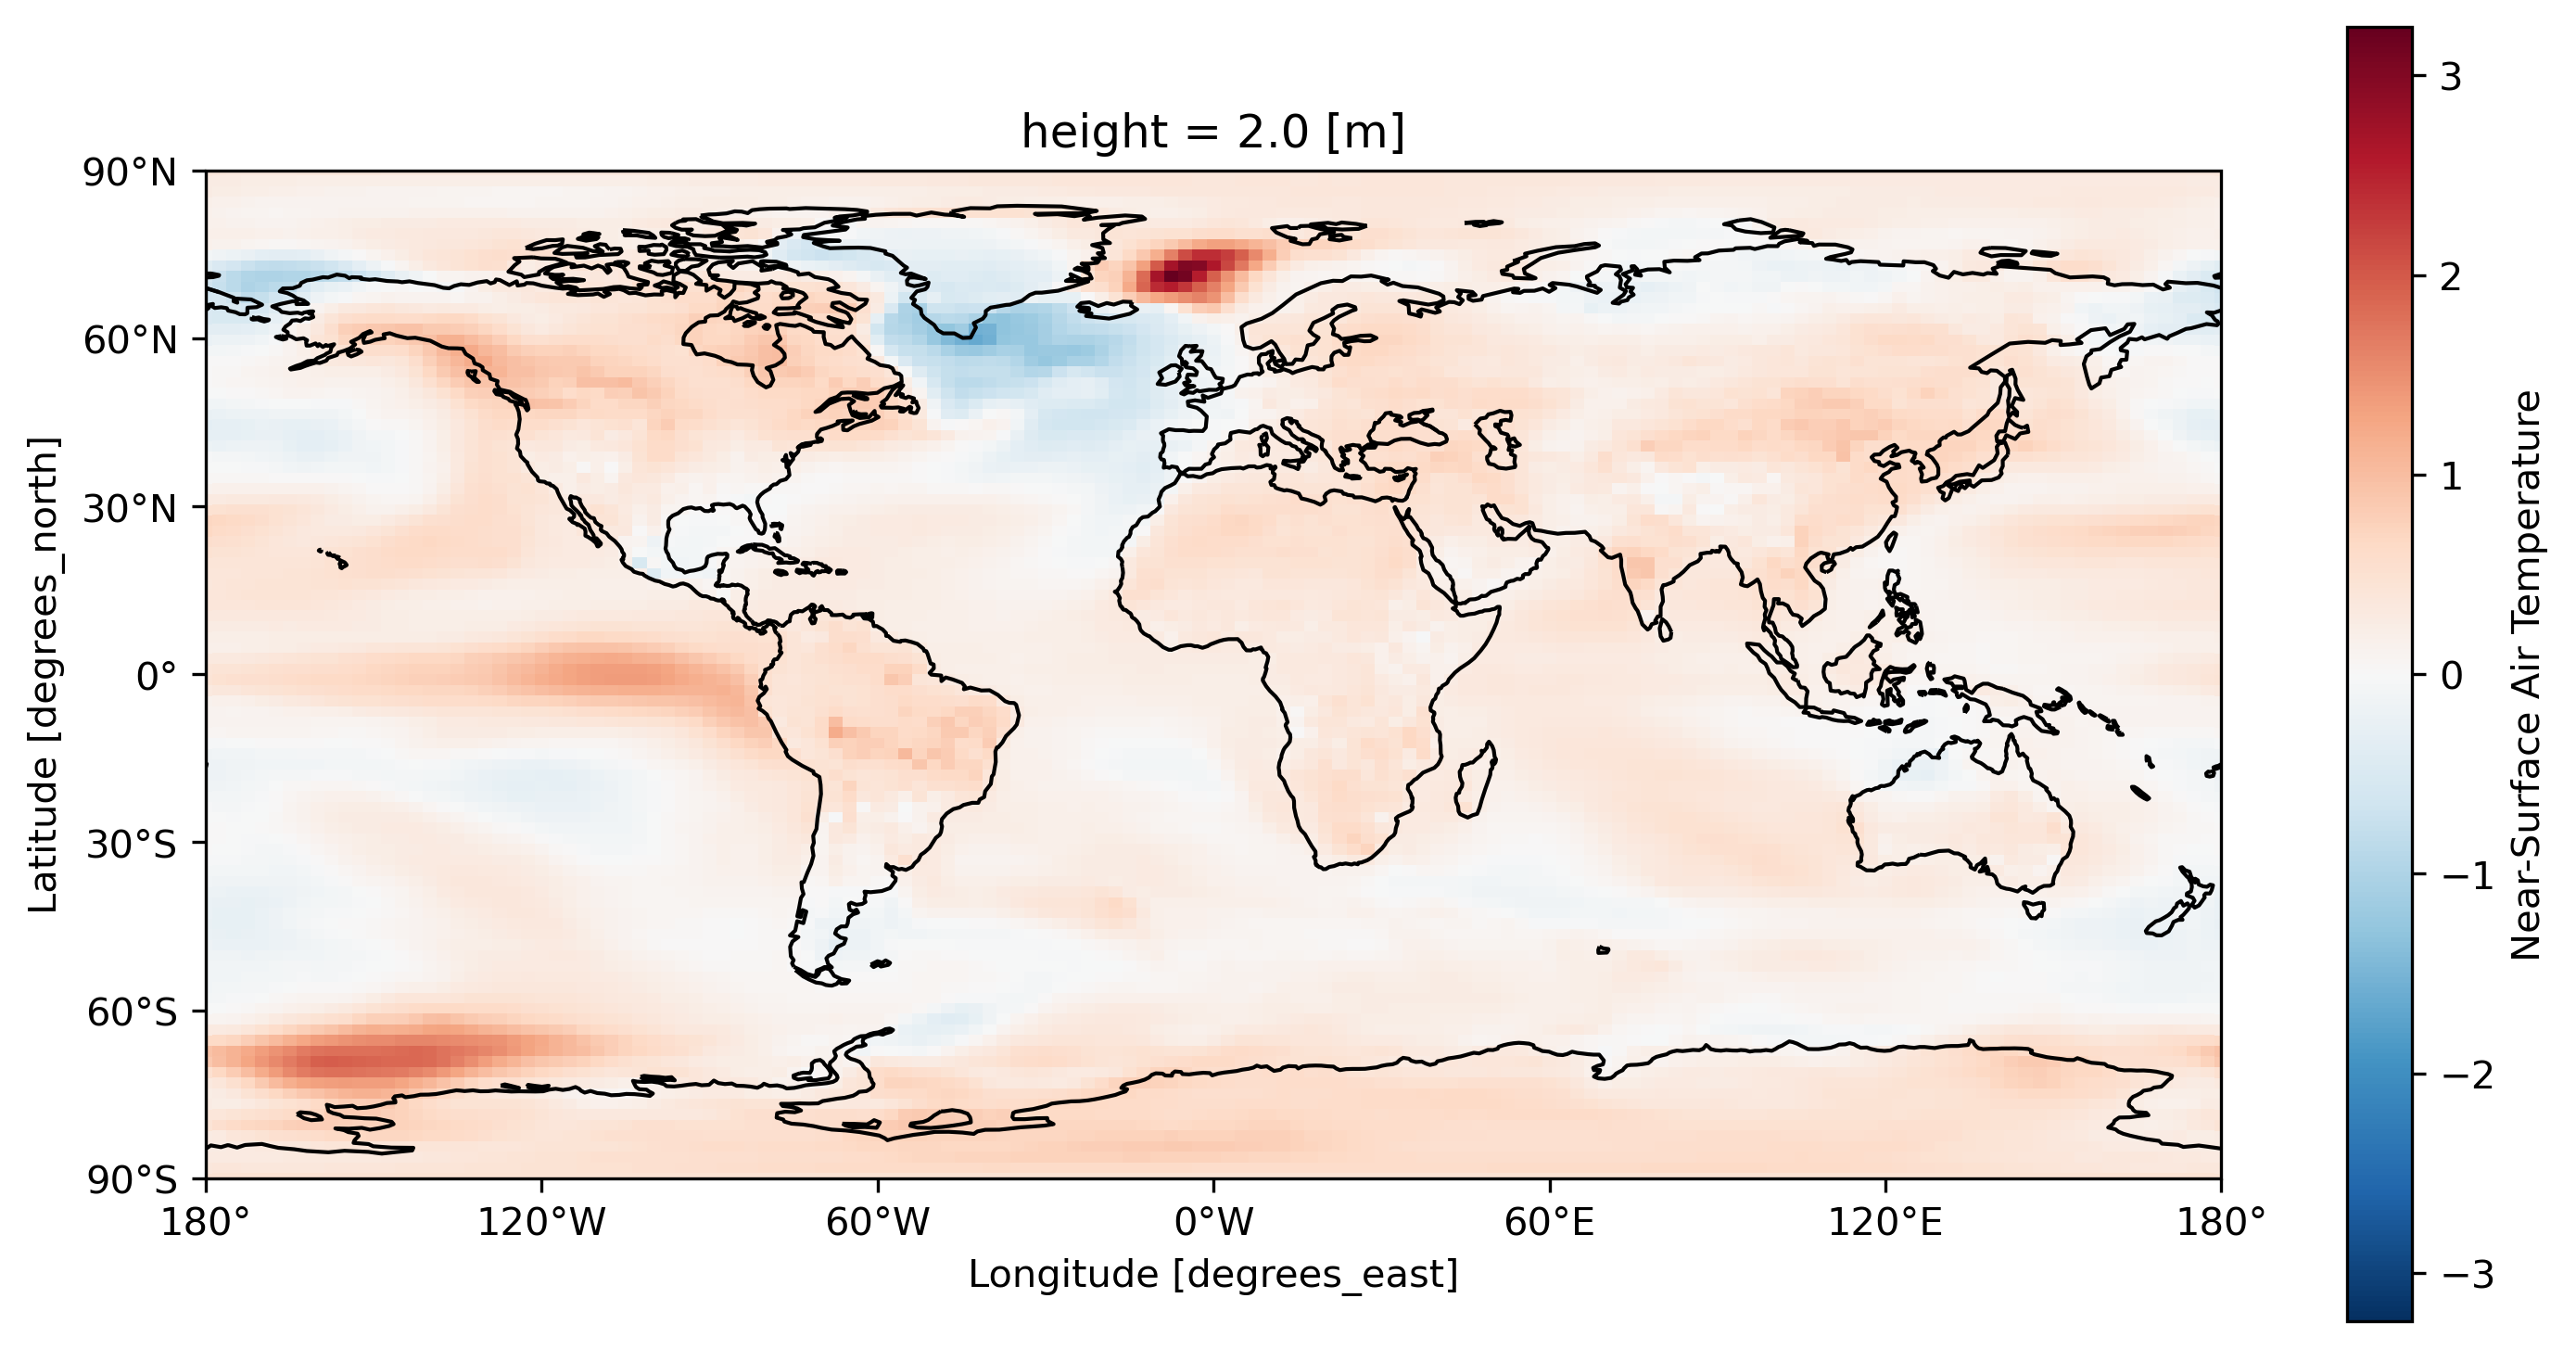

In [ ]:
fig = plt.figure(1, figsize=(10,5), dpi=300)
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
plt.title(tas_NorESM.tas.long_name)
diff = post_SPG - pre_SPG
map = diff.plot(ax=ax, 
                transform=ccrs.PlateCarree(),
                cbar_kwargs={"label": "Near-Surface Air Temperature"})
ax.coastlines()
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
   
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())

### COLORBAR ###
#cb = fig.colorbar(map, label=tas_NorESM.tas.long_name, extend='max', orientation="horizontal", shrink=0.5, pad=0.05)

plt.tight_layout()